In [1]:
% matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

In [2]:
j = complex(0,1)

In [22]:
norm = lambda x, y: np.exp(-(x)**2-(y)**2)
x0 = -100
dx = 0.05
x=np.arange(x0,-x0,dx)
y0 = -100
dy = 0.05
y=np.arange(y0,-y0,dy)

In [23]:
X, Y=np.meshgrid(x,y)

In [5]:
def get_fourier_2d(X, Y, f):

#Compute Fourier transform by numpy's FFT function
    g=np.fft.fft2(f(X,Y))
#frequency normalization factor is 2*np.pi/dx
    dx = X[0][1]-X[0][0]
    dy = Y[1][0]-Y[0][0]
    wx = np.fft.fftfreq(X[0].size)*2*np.pi/dx
    wy = np.fft.fftfreq(Y[0].size)*2*np.pi/dy
    
    Wx, Wy = np.meshgrid(wx, wy)


#In order to get a discretisation of the continuous Fourier transform
#we need to multiply g by a phase factor
    g*=dx*np.exp(-complex(0,1)*Wx*x0)/(np.sqrt(2*np.pi))*dy*np.exp(-complex(0,1)*Wy*y0)/(np.sqrt(2*np.pi))
    
    return Wx, Wy, g


<IPython.core.display.Javascript object>


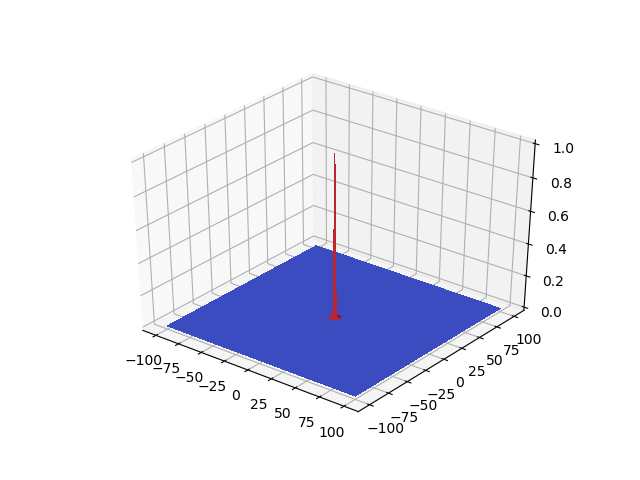

In [24]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, norm(X,Y) , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<IPython.core.display.Javascript object>


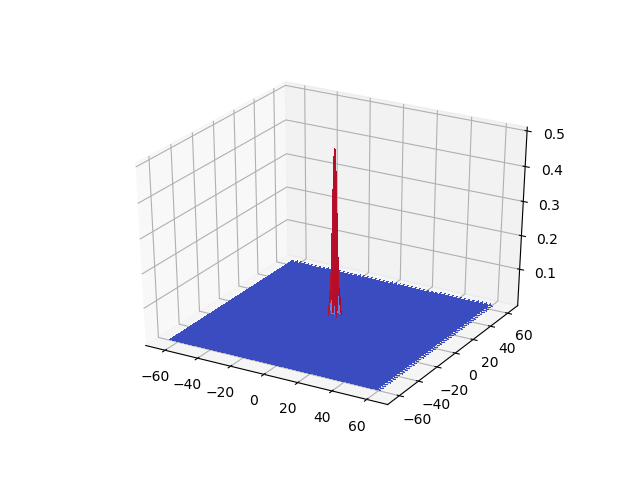

In [25]:
fig = plt.figure()
X, Y = np.meshgrid(x,y)
Wx, Wy, four= get_fourier_2d(X,Y,norm)
ax = fig.gca(projection='3d')
ax.plot_surface(Wx, Wy, np.abs(four) , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)




<IPython.core.display.Javascript object>


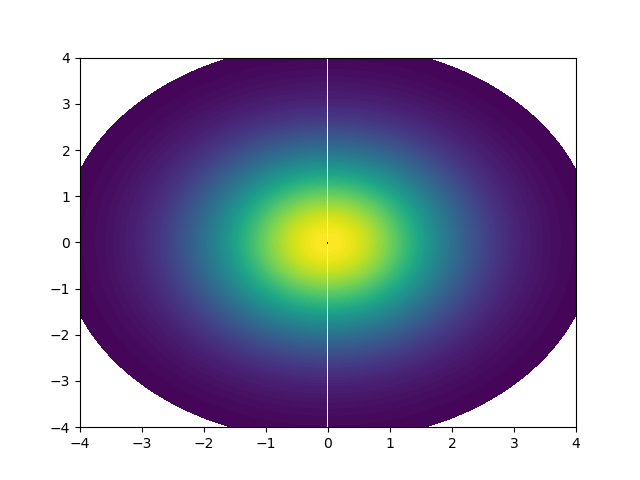

(-4, 4)

In [27]:
fig, ax = plt.subplots()
ax.contourf(Wx, Wy, np.abs(four), 100)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

In [26]:
Y[1][0]-Y[0][0]

0.04999999999999716